In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

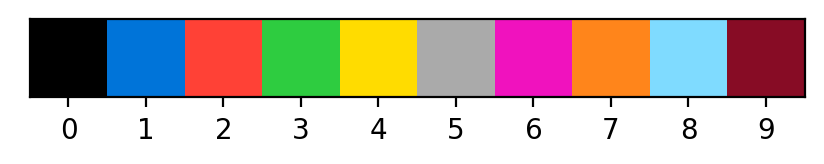

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
def getObjectHash(pixmap):
    flat = pixmap.flatten().astype(np.bool)
    mult = np.array([2 ** x for x in range(len(flat))])
    return np.sum(flat * mult)
#經測試沒有overflow問題
def groupByColor(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]
def checkColorMap(a,b):
    c = 1
    inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
    out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
    c *= inp_hashes == out_hashes
    return bool(c)

In [10]:
def applyColorMap(pixmap, colormap):
    a1=np.array(pixmap)
    for i in range(a1.shape[0]):
        for j in range(a1.shape[1]):
            if a1[i][j] not in colormap:
                continue
            a1[i][j]=colormap[pixmap[i][j]]
    return a1.tolist()

In [11]:
def Match_output_color_change_mode(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    A=np.array(Output[0])
    solved=True
    if np.array(Input[0]).shape!=np.array(A).shape:
        return False
    for i in range(1,len(Output)):
        B=np.array(Output[i])
        if len(np.unique(B))==1:
            solved=False
            break
        if checkColorMap(A,B)==False:
            solved=False
            break
    return solved
        

In [12]:
def solve_output_color_change_mode(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    if Match_output_color_change_mode(basic_task)==True:
        A=Output[0]
        use_c=-1
        for c in range(0,10):
            res=True
            for x, y in zip(Input,Output):
                colormap={}
                for i in range(len(x)):
                    for j in range(len(x[0])):
                        if x[i][j]!=c and A[i][j] not in colormap:
                            colormap[A[i][j]]=x[i][j]
               
                B=applyColorMap(A,colormap)
                
                if B!=y:
                    res=False
                    break
            if res==True:
                use_c=c
                break
        if use_c==-1:
            return -1
        else:
            colormap_T={}
            for i in range(len(Test_Case)):
                for j in range(len(Test_Case[0])):
                    if Test_Case[i][j]!=c and A[i][j] not in colormap_T:
                        colormap_T[A[i][j]]=Test_Case[i][j]
                        
            B=applyColorMap(A,colormap_T)
            return B
        
    else:
        return -1
    

6 0


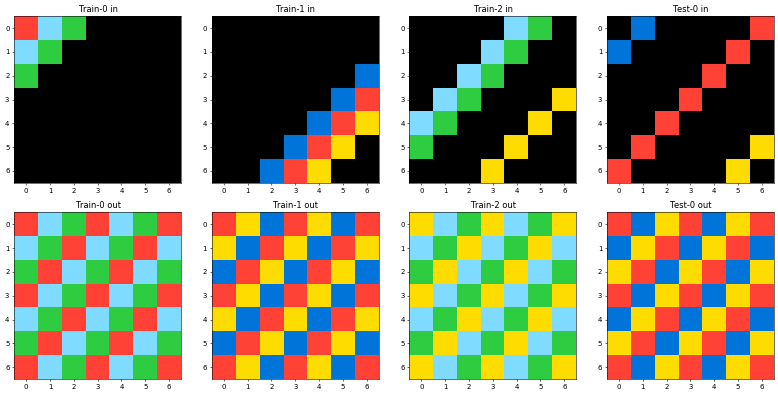

15 0


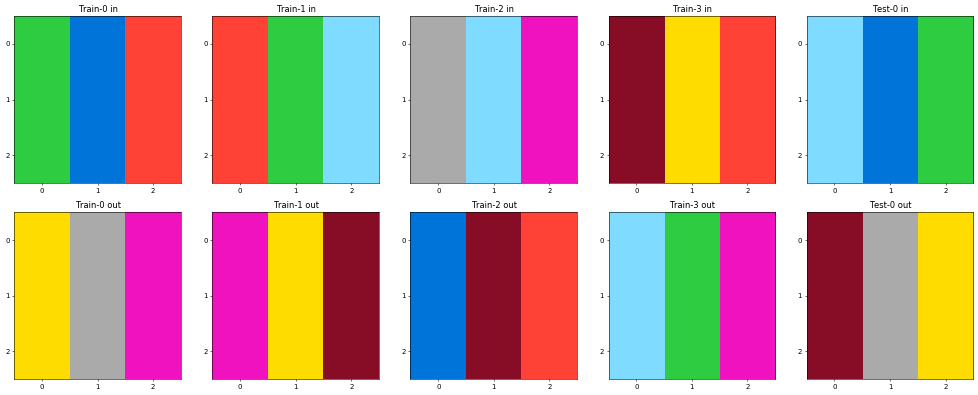

27 0


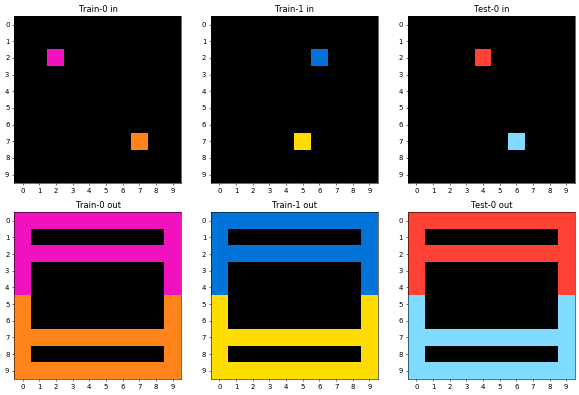

372 0


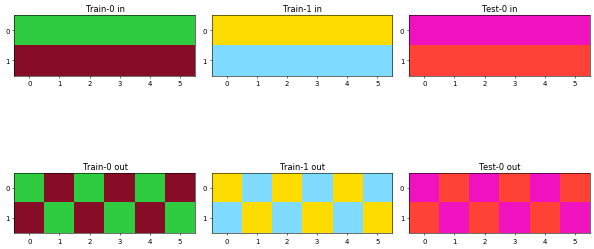

In [13]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=Match_output_color_change_mode(basic_task)
        if a!=False:
            print(i,j)
            #solved_train.append((i,j))
            plot_task(task)
        

6 0


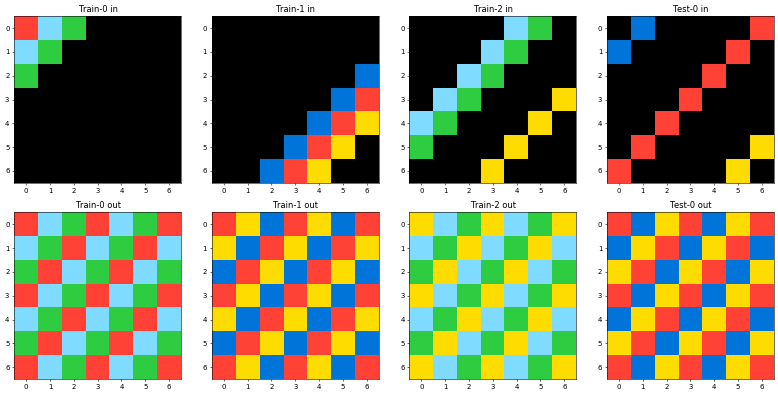

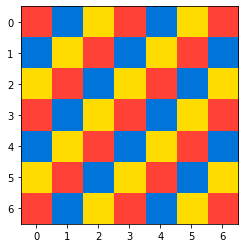

27 0


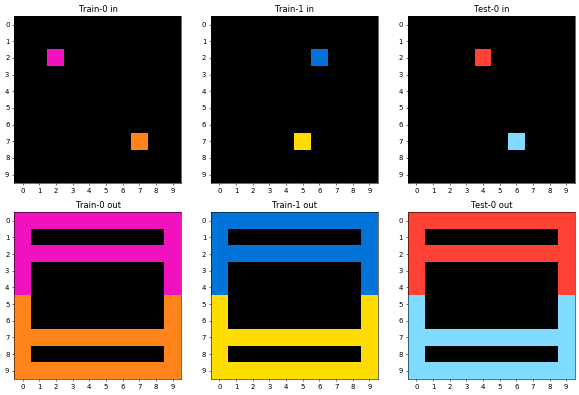

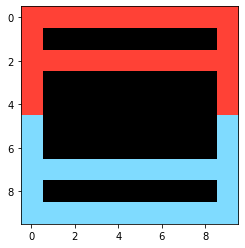

In [15]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_output_color_change_mode(basic_task)
        if a!=-1:
            print(i,j)
            #solved_train.append((i,j))
            plot_task(task)
            plot_picture(a)
            solved_id.add(i)
            

In [16]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_output_color_change_mode(basic_task)
        if a!=-1:
            print(i,j)
            #solved_train.append((i,j))
            plot_task(task)
            plot_picture(a)
            solved_eva_id.add(i)

In [18]:
list(solved_id)

[27, 6]